In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import sklearn.datasets
from scipy.spatial.distance import cdist
from numpy import linalg
from numpy.linalg import norm

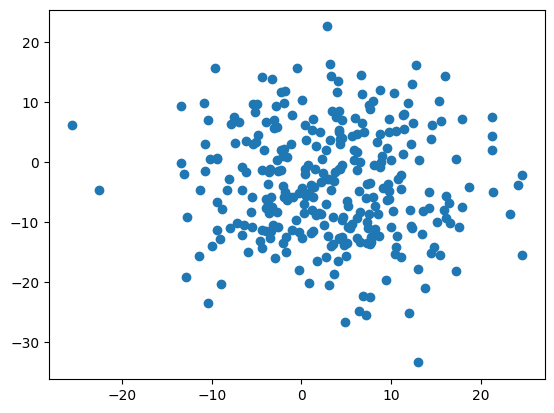

In [ ]:
#Данные для кластеризации:

X, y = make_blobs(n_samples = 300, 
                 centers = 3, 
                 n_features = 2,
                 random_state = 10,
                 cluster_std = 8.0)


plt.scatter(X[:,0], X[:,1])
plt.show()

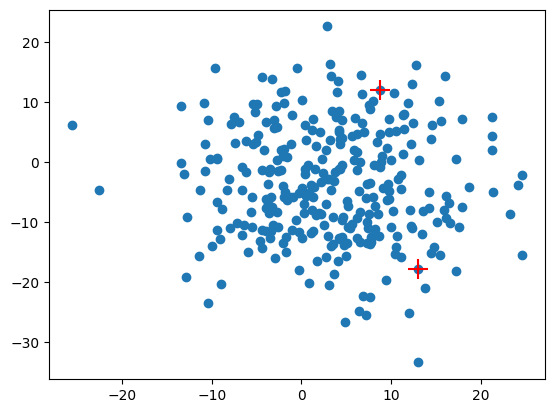

In [ ]:
#инициализация кластеров: 

k = 2 #Задаётся число кластеров и их центров
centers = X[np.random.choice(range(len (X)), k, replace=False)]
centers
plt.scatter (X[:, 0], X[:, 1])
plt.scatter (centers[:, 0], centers[:, 1], marker='+', s=200, c='red')
plt.show()

In [ ]:
clusters = []
for i in range(len(X)):
    # определяется расстояние до центров
    distance = np.linalg.norm(X[i] - centers, axis=1)
    # определяется центр, расстояние до которого минимально
    cluster = np.argmin (distance)
    # добавление метки кластера к конкретному наблюдению
    clusters.append(cluster)
np.array(clusters)

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

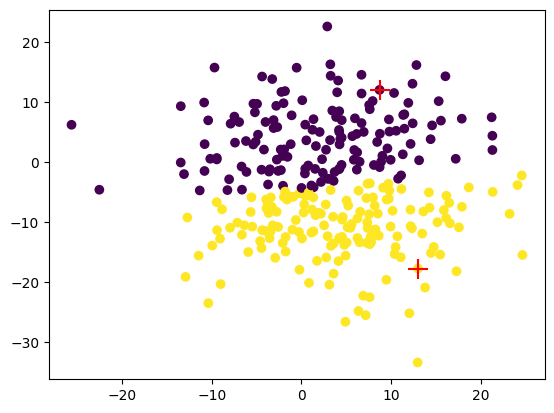

In [ ]:
#визуализация кластеров:

plt.scatter (X[:, 0], X[:, 1], c=clusters) 
plt.scatter(centers[:, 0], centers[:, 1], marker='+', s=200, c = 'red')
plt.show()

In [ ]:
#пересчет центров:

centers = []
for i in range(k):
    # Определяется новый центр как среднее всех значений кластера
    center = X[np.array(clusters) == i].mean(axis=0)
    # Добавляется новый центр в список центров
    centers.append(center)
    
    
np.array(centers)

array([[  1.98502373,   4.20530861],
       [  4.47730147, -11.25391092]])

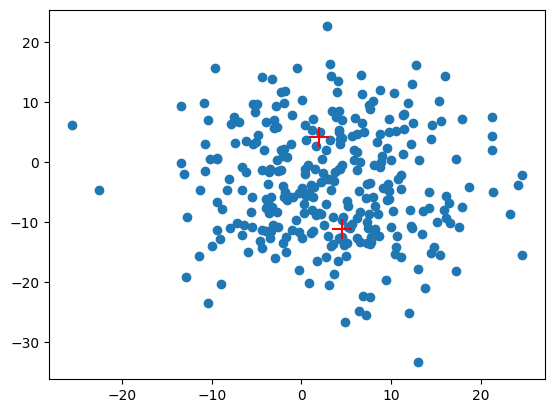

In [ ]:
#визуализация новых центров:

plt.scatter (X[:, 0], X[:, 1]) 
plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], marker='+', s=200, c = 'red')
plt.show()


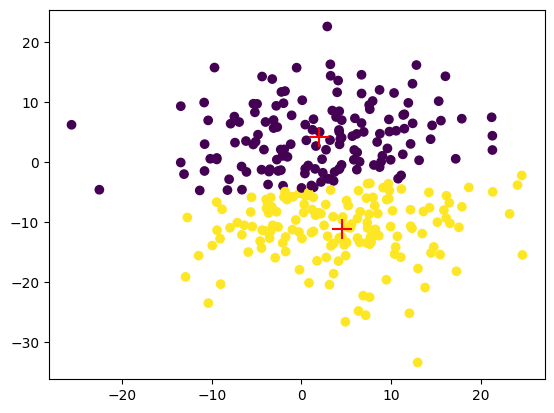

In [ ]:
#пересчет и визуализация:

plt.scatter (X[:, 0], X[:, 1], c = clusters) 
plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], marker='+', s=200, c = 'red')
plt.show()

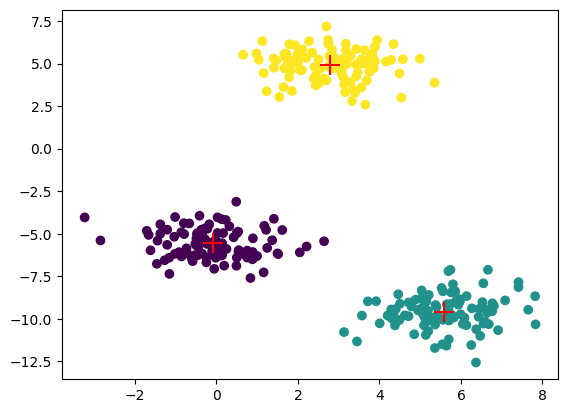

In [ ]:
# Генерация данных
# Инициализация начальных центров кластеров
X, y = make_blobs (n_samples=300, 
                   centers=3, 
                   n_features=2, 
                   random_state=10, 
                   cluster_std=1.0)
k = 3
centers = X[np.random. choice(range (len (X)), k, replace=False)]
# Определение принадлежности объектов к кластерам
def assign_clusters(X, centers):
    clusters = []
    for i in range(len (X)):
        distances = np.linalg.norm(X[i] - centers, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)
# Пересчет центров кластеров
def update_centers(X, clusters, k):
    centers = []
    for i in range (k):
        center = X[clusters == i].mean(axis=0)
        centers.append(center)
    return np.array(centers)
# Кластеризация
for i in range (100):
    clusters = assign_clusters(X, centers)
    centers = update_centers(X, clusters, k)
# Визуализация 
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.scatter(centers[:, 0], centers[:, 1], marker='+' , s=200, c='red')
plt.show() 

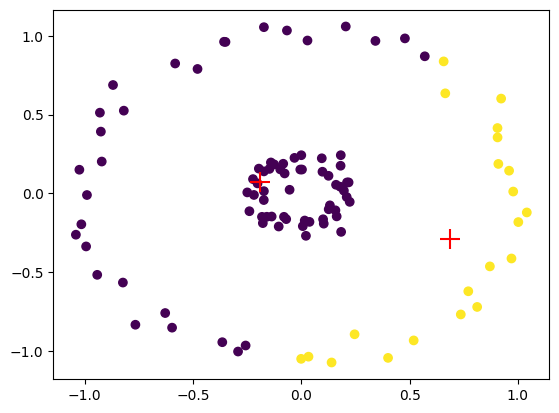

In [ ]:
# Генерация данных
# Инициализация начальных центров кластеров
X = sklearn.datasets.make_circles(n_samples=100,factor=.2, noise=0.05)[0]
k = 2
centers = X[np.random. choice(range (len (X)), k, replace=False)]
# Определение принадлежности объектов к кластерам
def assign_clusters(X, centers):
    clusters = []
    for i in range(len (X)):
        distances = np.linalg.norm(X[i] - centers, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)
# Пересчет центров кластеров
def update_centers(X, clusters, k):
    centers = []
    for i in range (k):
        center = X[clusters == i].mean(axis=0)
        centers.append(center)
    return np.array(centers)
# Кластеризация
for i in range (100):
    clusters = assign_clusters(X, centers)
    centers = update_centers(X, clusters, k)
# Визуализация 
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.scatter(centers[:, 0], centers[:, 1], marker='+' , s=200, c='red')
plt.show() 

In [ ]:
def get_kernel(X,Y,kernel='rbf',gamma=None, degree=3):
  if kernel=='linear':
    K=np.dot(X,Y.T)
  elif kernel == 'rbf':
    if gamma is None:
      gamma = 1.0/X.shape[1]
    K = np.exp (-gamma*cdist(X,Y,'sqeuclidean'))
  return K

In [ ]:
import numpy as np

from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state


class KernelKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=3, max_iter=50, tol=1e-3, random_state=None,
                 kernel="linear", gamma=None, degree=3, coef0=1,
                 kernel_params=None, verbose=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.verbose = verbose
        
    def _pairwise(self):
        return self.kernel == "precomputed"

    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, y=None, sample_weight=None):
        n_samples = X.shape[0]

        K = self._get_kernel(X)

        sw = sample_weight if sample_weight else np.ones(n_samples)
        self.sample_weight_ = sw

        rs = check_random_state(self.random_state)
        self.labels_ = rs.randint(self.n_clusters, size=n_samples)

        dist = np.zeros((n_samples, self.n_clusters))
        self.within_distances_ = np.zeros(self.n_clusters)

        for it in range(self.max_iter):
            dist.fill(0)
            self._compute_dist(K, dist, self.within_distances_,
                               update_within=True)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)

            # Вычислите количество выборок, кластер которых не изменился
            # с последней итерации.
            n_same = np.sum((self.labels_ - labels_old) == 0)
            if 1 - float(n_same) / n_samples < self.tol:
                if self.verbose:
                    print ("Сходится на итерации"), it + 1
                break

        self.X_fit_ = X

        return self

    def _compute_dist(self, K, dist, within_distances, update_within):
        """Вычисляем n_samples x n_clusters матрицу расстояний, используя ядерный метод."""
        sw = self.sample_weight_

        for j in range(self.n_clusters):
            mask = self.labels_ == j

            if np.sum(mask) == 0:
                raise ValueError("Найден пустой кластер, попробуйте уменьшить n_cluster")

            denom = sw[mask].sum()
            denomsq = denom * denom

            if update_within:
                KK = K[mask][:, mask]  # K[mask, mask] не работает.
                dist_j = np.sum(np.outer(sw[mask], sw[mask]) * KK / denomsq)
                within_distances[j] = dist_j
                dist[:, j] += dist_j
            else:
                dist[:, j] += within_distances[j]

            dist[:, j] -= 2 * np.sum(sw[mask] * K[:, mask], axis=1) / denom

    def predict(self, X):
        K = self._get_kernel(X, self.X_fit_)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self._compute_dist(K, dist, self.within_distances_,
                           update_within=False)
        return dist.argmin(axis=1)


In [ ]:
km = KernelKMeans(n_clusters=2,kernel='rbf',gamma=5, max_iter=100, random_state=0, verbose=1)
km.fit_predict(X)
y_pred = km.predict(X)

Сходится на итерации


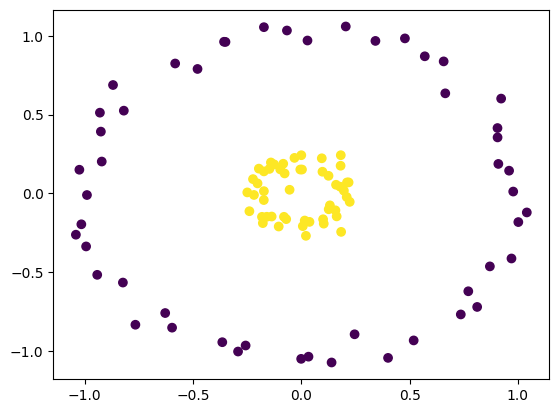

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)